In [44]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
from matplotlib.cm import get_cmap


In [31]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [32]:
# set date format
date_format = "%Y/%m/%d %H:%M:%S%z"
# drop columns for Davidson and Huntersville
columns_to_remove = ['Davidson', 'Huntersville']
# convert the "DATE_INCIDENT_BEGAN" column to datetime format
crimeDF['DATE_INCIDENT_BEGAN'] = pd.to_datetime(crimeDF['DATE_INCIDENT_BEGAN'], format=date_format, errors='coerce')

# filter the data to include only incidents between 2019 and 2023
startDate = pd.Timestamp("2017-01-01", tz='UTC')
endDate = pd.Timestamp("2023-12-31 23:59:59", tz='UTC')
crimeDF = crimeDF[(crimeDF['DATE_INCIDENT_BEGAN'] >= startDate) & (crimeDF['DATE_INCIDENT_BEGAN'] <= endDate)]

# extract the year and month from the "DATE_INCIDENT_BEGAN" column
crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')

# group the data by CMPD patrol division and YearMonth, then count the number of incidents
crimesPerMonth = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YearMonth']).size().reset_index(name='Crime Count')

# pivot the table to create columns for each patrol division and fill missing values with 0
crimeTable = crimesPerMonth.pivot(index='YearMonth', columns='CMPD_PATROL_DIVISION', values='Crime Count').fillna(0)

# You can also reset the index to make YearMonth a regular column if needed
# crime_pivot.reset_index(inplace=True)

# Display the resulting table
crimeTable.drop(columns=columns_to_remove, inplace=True)
pd.set_option('display.max_rows', 70)
crimeTable

C:\Users\Tina\AppData\Local\Temp\ipykernel_2600\1779071507.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')


CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Unknown,Westover
YearMonth,,,,,,,,,,,,,,,
2017-01,77.0,462.0,581.0,649.0,543.0,545.0,613.0,699.0,753.0,488.0,454.0,722.0,818.0,0.0,529.0
2017-02,63.0,498.0,463.0,583.0,450.0,445.0,573.0,627.0,560.0,489.0,368.0,607.0,753.0,0.0,488.0
2017-03,79.0,477.0,480.0,610.0,501.0,461.0,595.0,638.0,625.0,413.0,424.0,699.0,683.0,0.0,526.0
2017-04,69.0,471.0,463.0,569.0,538.0,502.0,592.0,656.0,668.0,441.0,448.0,705.0,762.0,0.0,543.0
2017-05,97.0,548.0,550.0,620.0,580.0,517.0,664.0,777.0,725.0,504.0,452.0,792.0,771.0,0.0,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06,150.0,634.0,447.0,600.0,459.0,391.0,567.0,657.0,558.0,467.0,439.0,874.0,951.0,0.0,625.0
2023-07,143.0,600.0,483.0,594.0,434.0,452.0,561.0,710.0,532.0,543.0,398.0,941.0,941.0,0.0,657.0
2023-08,148.0,602.0,491.0,576.0,397.0,412.0,550.0,664.0,564.0,501.0,395.0,871.0,914.0,0.0,651.0


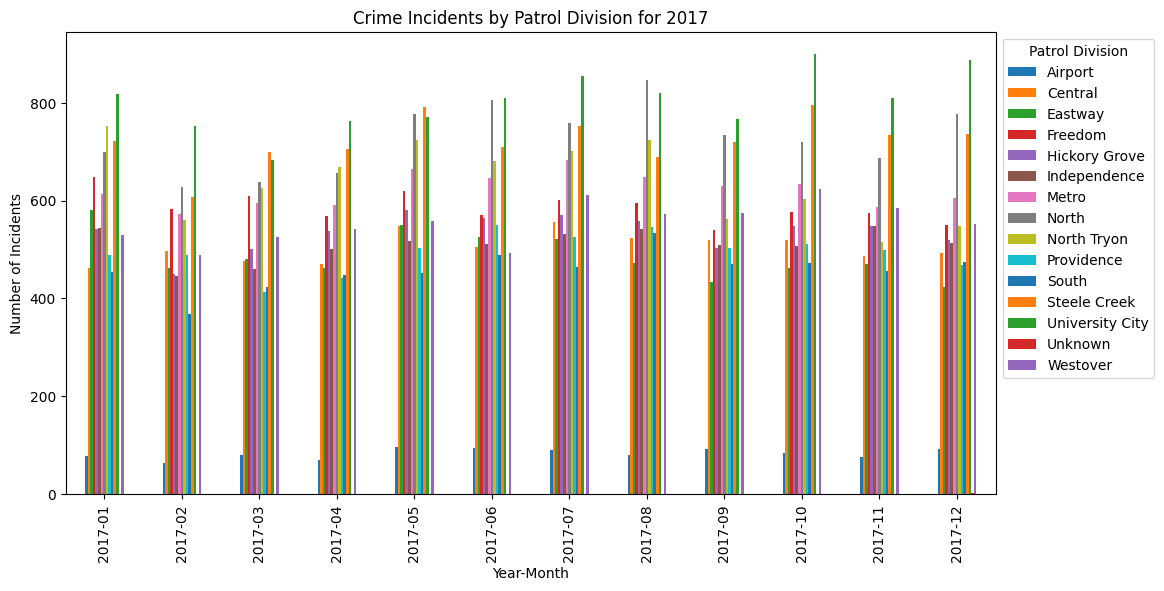

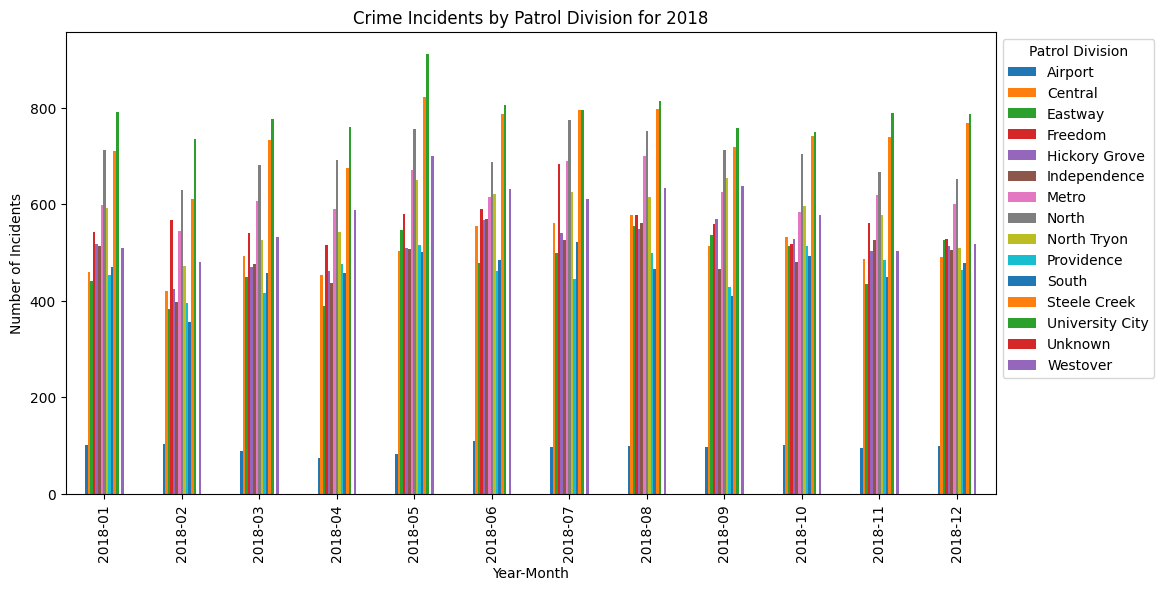

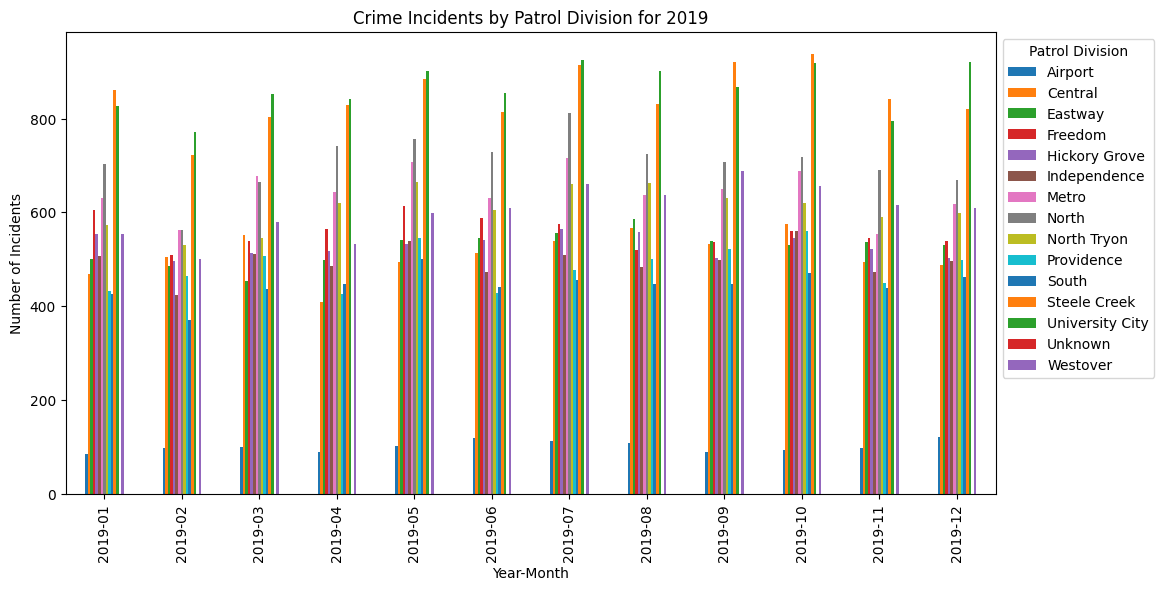

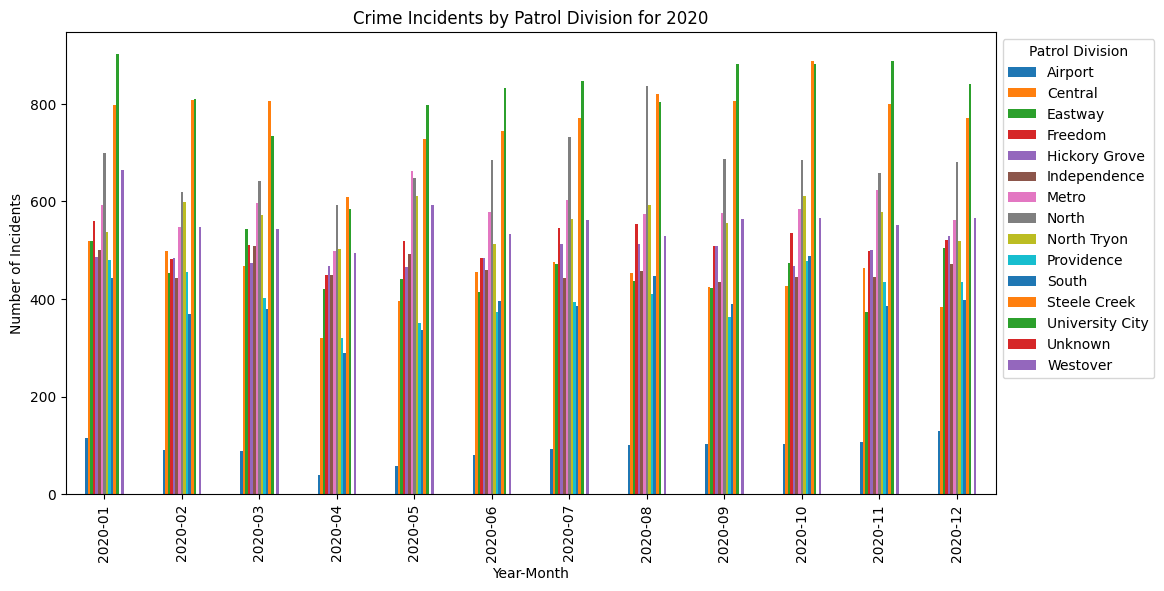

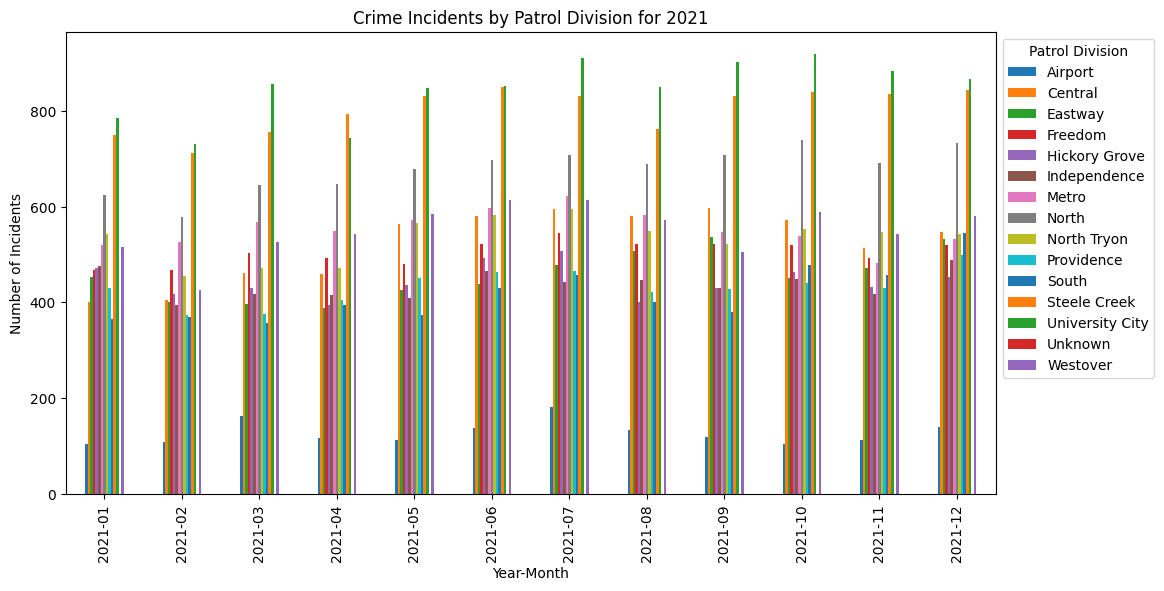

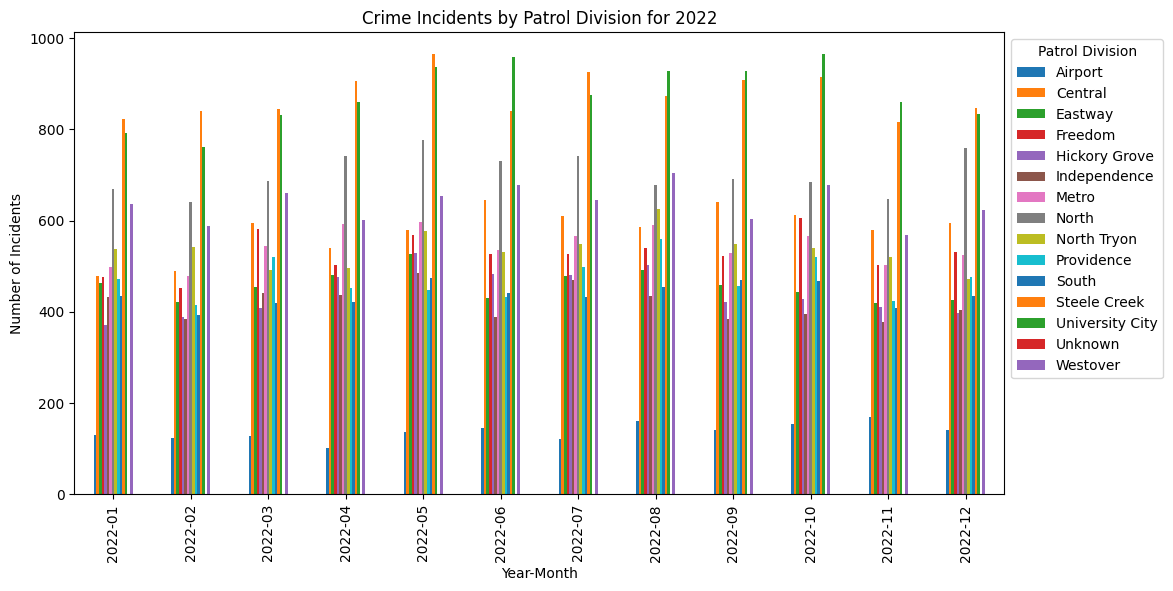

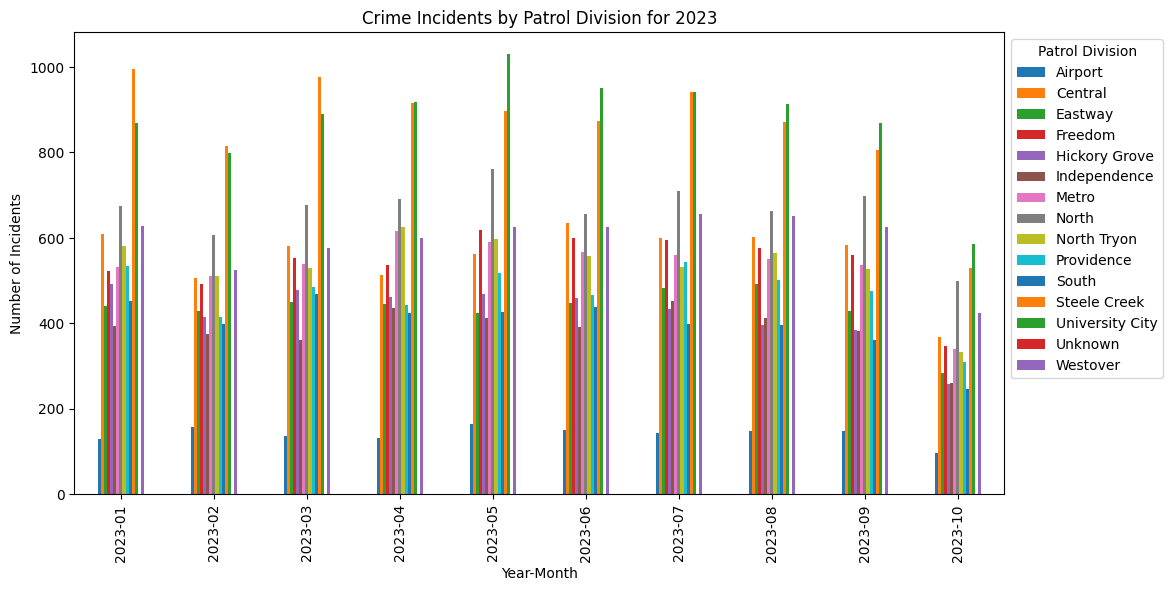

In [33]:
# iterate through the years in the index of the crimeTable DataFrame
years = crimeTable.index.year.unique()
for year in years:
    # filter the data for the specific year
    year_data = crimeTable[crimeTable.index.year == year]
    
    # create a bar chart for the current year
    ax = year_data.plot(kind='bar', stacked=False, figsize=(12, 6), title=f'Crime Incidents by Patrol Division for {year}')
    
    # customize the chart appearance (you can further customize it as needed)
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Patrol Division', loc='upper left', bbox_to_anchor=(1, 1))
    
    # show the chart
    plt.show()

In [34]:
# Calculate the sum of incidents for each year
yearly_sum = crimeTable.resample('Y').sum()

# Calculate the difference in incidents from year to year
yearly_difference = yearly_sum.diff()

# Display the resulting DataFrame
yearly_difference

CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Unknown,Westover
YearMonth,,,,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,157.0,-14.0,-94.0,-272.0,-272.0,-163.0,-26.0,-302.0,-687.0,-387.0,43.0,240.0,-153.0,-1.0,271.0
2019,66.0,91.0,552.0,-65.0,198.0,-9.0,268.0,56.0,320.0,262.0,-205.0,1279.0,895.0,0.0,313.0
2020,-108.0,-856.0,-833.0,-533.0,-460.0,-409.0,-716.0,-314.0,-548.0,-919.0,-635.0,-834.0,-574.0,0.0,-529.0
2021,427.0,999.0,8.0,-108.0,-555.0,-301.0,-356.0,-21.0,-353.0,291.0,299.0,289.0,343.0,0.0,-100.0
2022,111.0,671.0,17.0,279.0,-39.0,-222.0,-122.0,301.0,25.0,486.0,241.0,872.0,385.0,0.0,1028.0
2023,-243.0,-1391.0,-1173.0,-940.0,-1048.0,-1154.0,-1178.0,-1805.0,-1068.0,-980.0,-1241.0,-1887.0,-1763.0,0.0,-1704.0


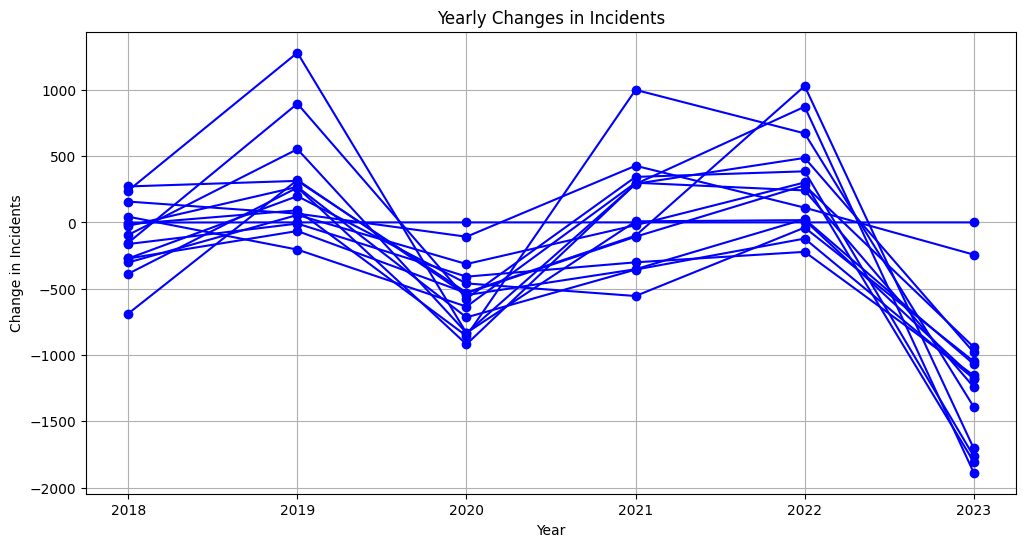

In [35]:
# Convert the period index to a list of strings representing years
year_labels = yearly_difference.index.to_timestamp().strftime('%Y')

# Create a line chart to visualize the yearly changes
plt.figure(figsize=(12, 6))
plt.plot(year_labels, yearly_difference, marker='o', linestyle='-', color='b')
plt.title('Yearly Changes in Incidents')
plt.xlabel('Year')
plt.ylabel('Change in Incidents')
plt.grid(True)

# Display the line chart
plt.show()

C:\Users\Tina\AppData\Local\Temp\ipykernel_2600\4139678298.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c')


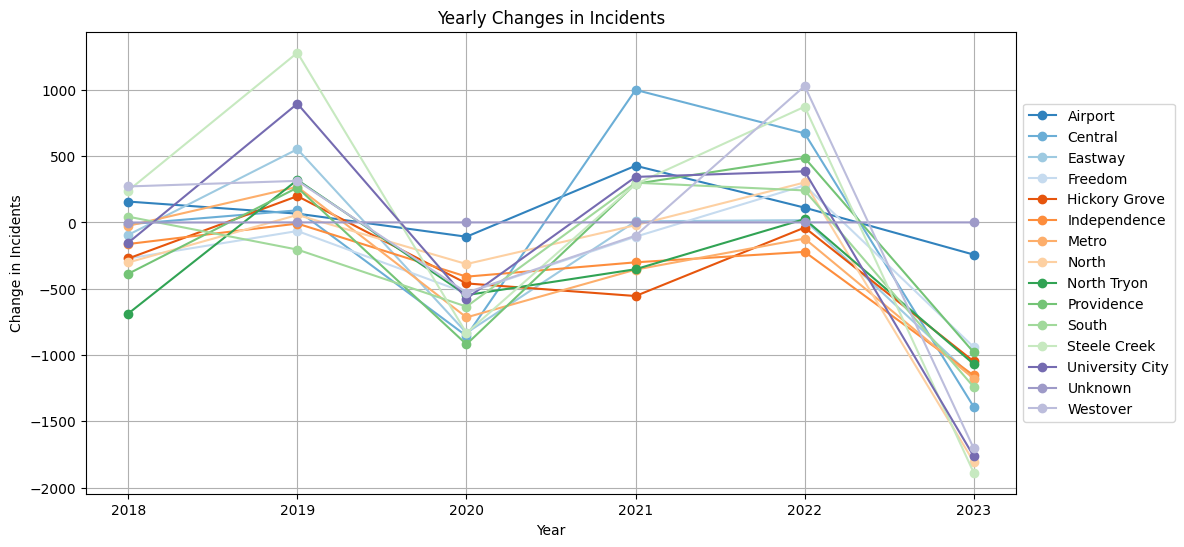

In [37]:
# Convert the period index to a list of strings representing years
year_labels = yearly_difference.index.to_timestamp().strftime('%Y')

# Create a line chart to visualize the yearly changes with distinct colors
plt.figure(figsize=(12, 6))

# Get a color map (you can choose any colormap you like)
cmap = get_cmap('tab20c')

# Iterate through each line and assign a distinct color
for i, col in enumerate(yearly_difference.columns):
    color = cmap(i)
    plt.plot(year_labels, yearly_difference[col], marker='o', linestyle='-', label=col, color=color)

plt.title('Yearly Changes in Incidents')
plt.xlabel('Year')
plt.ylabel('Change in Incidents')
plt.legend()  # Display the legend for each line

# Move the legend to the right side (adjust the coordinates as needed)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

# Display the line chart
plt.show()

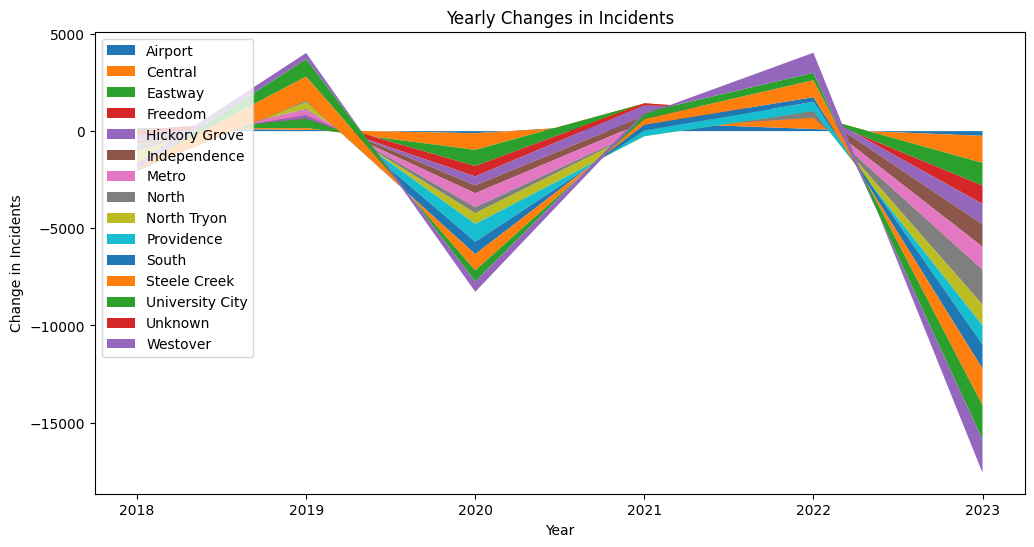

In [38]:
# # Convert the period index to a list of strings representing years
# year_labels = yearly_difference.index.to_timestamp().strftime('%Y')

# # Create a stacked area chart
# plt.figure(figsize=(12, 6))
# plt.stackplot(year_labels, yearly_difference.values.T, labels=yearly_difference.columns)

# # Customize labels and title
# plt.title('Yearly Changes in Incidents')
# plt.xlabel('Year')
# plt.ylabel('Change in Incidents')

# # Add a legend
# plt.legend(loc='upper left')

# # Display the stacked area chart
# plt.show()


# idk about this one...